In [1]:
# Import libraries
import numpy as np
import librosa
import sounddevice as sd
import matplotlib.pyplot as plt
%matplotlib inline

Recording...
Recording finished


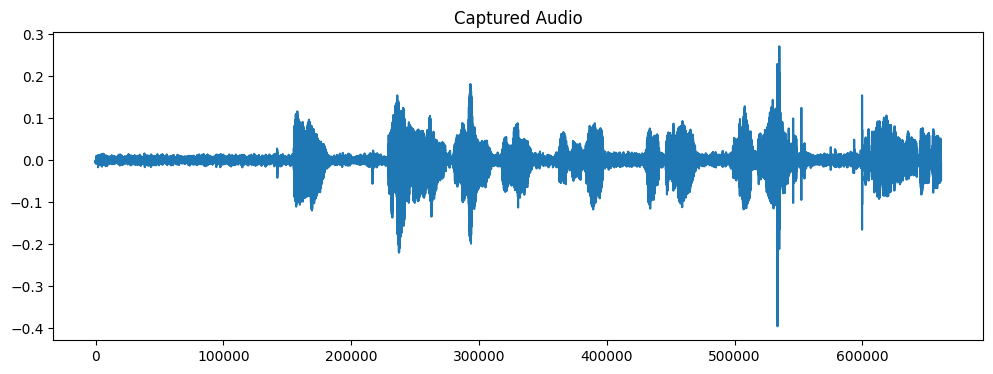

In [2]:
# Module 1: Audio Capture
def capture_audio(duration=15, fs=44100):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    print("Recording finished")
    return audio.flatten()

# Test of Module 1
audio = capture_audio()
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Captured Audio")
plt.show()

In [3]:
# Module 2: Preprocessing
def preprocess_audio(audio, fs=44100):
    # Normalization: Adjust the audio amplitude so that it is in a consistent range.
    # It helps make comparable audio signals from different sources or record them at different volumes.
    # Typically, each sample is divided by the absolute maximum value of the signal.
    audio = audio / np.max(np.abs(audio))
    
    # Silence removal: Remove parts of the signal that do not contain useful information (silence).
    # Reduces the amount of data to be processed and focuses on the relevant parts of the audio.
    # A threshold is used to determine which parts of the signal are considered silent and are removed.
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)
    
    # Apply pre-emphasis filter: Increase the energy of high frequencies relative to low frequencies.
    # Compensates for the natural tendency of speech signals to have less energy in high frequencies, which can improve feature extraction.
    # A first-order filter is applied that emphasizes higher frequencies
    preemphasized_audio = librosa.effects.preemphasis(trimmed_audio)
    
    return preemphasized_audio

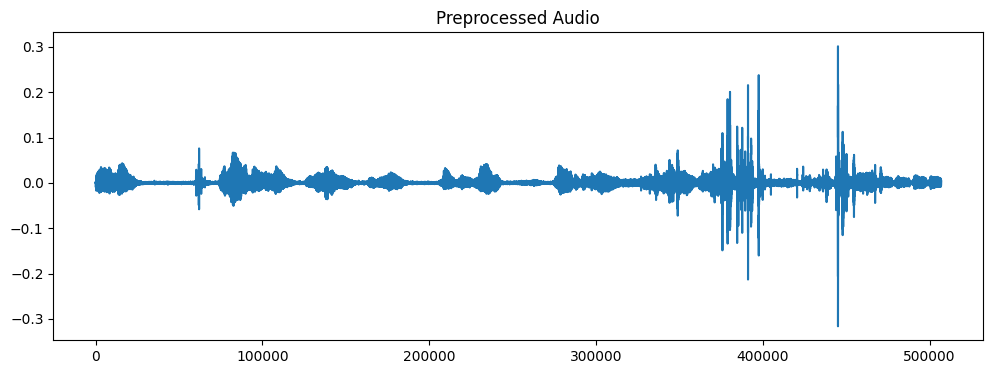

In [4]:
# Test of Module 2
processed_audio = preprocess_audio(audio)
plt.figure(figsize=(12, 4))
plt.plot(processed_audio)
plt.title("Preprocessed Audio")
plt.show()

In [5]:
# Module 3: Feature Extraction
def extract_features(audio, fs=44100):
    # MFCC extraction (Mel-Frequency Cepstral Coefficients):
        # are a representation of the short-term power spectrum of a sound. 
        # They are widely used in speech recognition due to their ability to capture important audio characteristics compactly. 
        # The process to obtain MFCCs includes several steps:
        # a) The audio signal is divided into small fragments (frames).
        # b) Fourier Transform is applied to each frame to obtain the frequency spectrum.
        # c) A Mel-scale filter bank is applied to the spectrum. The Mel scale mimics the non-linear frequency perception of the human ear.
        # d) The logarithm of the energies in each Mel filter is taken.
        # e) Discrete Cosine Transform (DCT) is applied to these logarithms.
        # The resulting coefficients are the MFCCs. 
        # Typically, the first 13-20 coefficients are used, as they contain the most relevant information about the sound structure.
    mfccs = librosa.feature.mfcc(y=audio, sr=fs, n_mfcc=13)
    
    # Mel spectrogram extraction
    # is a visual representation of the frequencies present in an audio signal over time but adapted to the Mel scale. 
    # It is constructed as follows:
    # a) The audio signal is divided into overlapping frames.
    # b) Fourier Transform is applied to each frame.
    # c) The frequency scale is converted to the Mel scale.
    # d) The energy in each Mel frequency band is calculated.
    # e) This information is represented in a 2D graph, where the x-axis is time, the y-axis is Mel frequency bands and color or intensity represents the energy at each point.
    # The Mel spectrogram provides an intuitive visual representation of how frequencies in the audio change over time, adapted to human sound perception.
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=fs)
    
    return mfccs, mel_spec

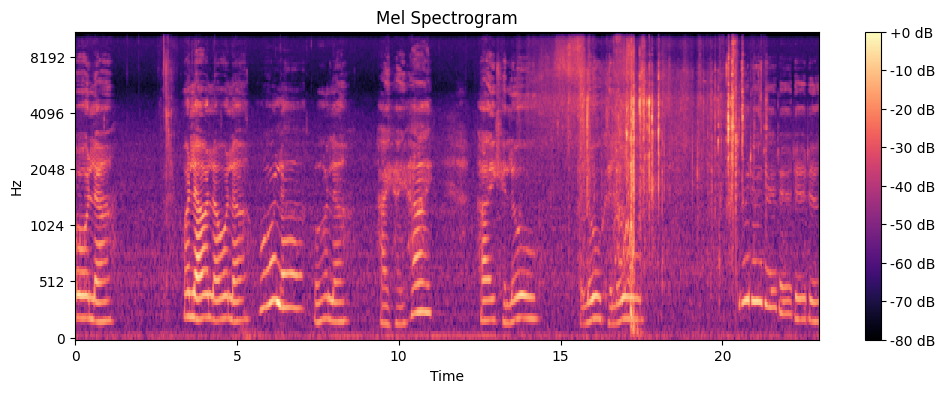

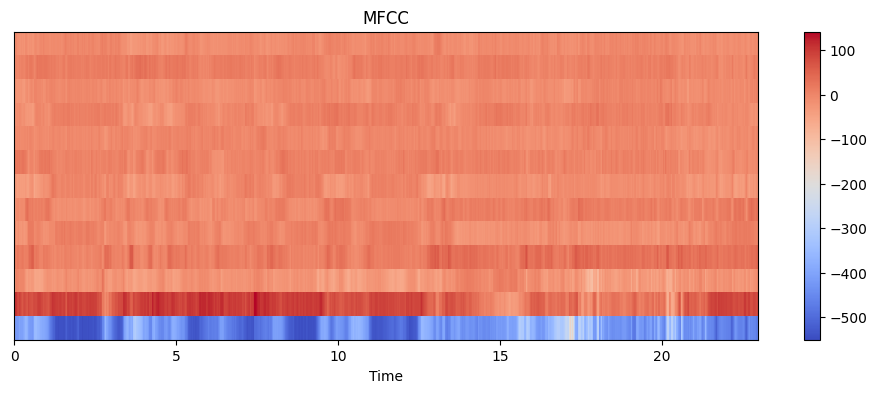

In [6]:
# Test of Module 3
mfccs, mel_spec = extract_features(processed_audio)
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [8]:
# Integration of modules
def process_voice(duration=5, fs=44100):
    audio = capture_audio(duration, fs)
    processed_audio = preprocess_audio(audio, fs)
    mfccs, mel_spec = extract_features(processed_audio, fs)
    return mfccs, mel_spec

In [9]:
# Test of integration
final_mfccs, final_mel_spec = process_voice()
print("Process completed. Features have been extracted.")

Recording...
Recording finished
Process completed. Features have been extracted.


In [10]:
print("final_mfccs: " , final_mfccs)

final_mfccs:  [[-358.97055    -345.83618    -354.519      ... -365.21042
  -368.00003    -376.32306   ]
 [  67.62308      85.138794     94.072105   ...   94.25067
    89.17624      93.70719   ]
 [  -0.71061265  -14.499674    -20.26936    ...  -23.389462
   -28.892551    -21.639587  ]
 ...
 [   2.3219073    -6.11518     -13.23785    ...   -9.801241
    -8.933735     -8.233201  ]
 [  12.016653     12.138328     15.014145   ...   19.417744
    16.166914     13.533466  ]
 [  -0.37787786   -3.03998      -7.1017895  ...    6.3377438
     0.59153837   -8.251002  ]]


In [11]:
print("final_mel_spec: ", final_mel_spec)

final_mel_spec:  [[2.3237422e-02 2.6058782e-02 6.3977297e-03 ... 9.1592878e-02
  4.0502865e-02 6.9586919e-03]
 [2.0287110e-02 3.4374144e-02 8.8071458e-02 ... 9.3578912e-02
  3.2513514e-02 6.1624739e-03]
 [3.1953312e-02 7.9789452e-02 8.7375998e-02 ... 2.5050731e-02
  6.2052994e-03 1.7988983e-03]
 ...
 [5.3463220e-05 2.8664410e-05 2.1110436e-05 ... 1.6613994e-05
  1.4408028e-05 1.4290560e-05]
 [3.3289129e-05 9.8429928e-06 2.5964871e-06 ... 1.2292376e-06
  1.2332914e-06 1.1802131e-06]
 [3.1219210e-05 7.7732220e-06 1.9325745e-08 ... 1.9321618e-08
  2.2376739e-08 2.3091845e-08]]
